## EDA on Vehicle Insurance Customer Data

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
# Loading the data files
customerDetails=pd.read_csv('customer_details.csv')
customerPolDetails=pd.read_csv('customer_policy_details.csv')

### Column Name for customer details table:

 ####          customer_id, 

 ####            Gender,

  ####           age, 
    
  ####           driving licence present,

  ####           region code, 

 ####            previously insured, 

 ####            vehicle age 

 ####            and vehicle damage, in respective order. 

In [7]:
customerDetails.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [8]:
customerDetails.rename(columns={'0':'customer_id','1':'Gender','2':'age','3':'driving licence present','4':'region code','5':'previously insured','6':'vehicle age','7':'vehicle damage'})

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [9]:
customerDetails=customerDetails.rename(columns={'0':'customer_id','1':'Gender','2':'age','3':'driving licence present','4':'region code','5':'previously insured','6':'vehicle age','7':'vehicle damage'})

In [10]:
customerDetails.columns

Index(['customer_id', 'Gender', 'age', 'driving licence present',
       'region code', 'previously insured', 'vehicle age', 'vehicle damage'],
      dtype='object')

### Column Name for customer_policy table:
####            customer_id, 

 ####             annual premium (in Rs), 
 
 ####            sales channel code, 

 ####            vintage and response. 

In [11]:
customerPolDetails.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [12]:
customerPolDetails.rename(columns={'0':'customer_id','1':'annual premium (in Rs)','2':'sales channel code','3':'vintage','4':'response'})

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [13]:
customerPolDetails=customerPolDetails.rename(columns={'0':'customer_id','1':'annual premium (in Rs)','2':'sales channel code','3':'vintage','4':'response'})

In [14]:
customerPolDetails.columns

Index(['customer_id', 'annual premium (in Rs)', 'sales channel code',
       'vintage', 'response'],
      dtype='object')

### Q2. Checking and Cleaning Data Quality:

In [15]:
# Generate a summary of count of all the null values column wise.
customerDetails.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [16]:
customerPolDetails.isnull().sum()

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

In [18]:
customerDetails['customer_id'].isna().sum()

386

In [19]:
customerDetails['customer_id'].count()

380723

In [20]:
customerPolDetails['customer_id'].isna().sum()

387

In [21]:
customerPolDetails['customer_id'].count()

380722

In [22]:
## Replace all null values for numeric columns by mean.
## Drop Null values for customer_id

customerPolDetails = customerPolDetails.dropna(subset=['customer_id'])

In [23]:
customerPolDetails['customer_id'].mean()

190547.49166320832

In [24]:
customerPolDetails['annual premium (in Rs)'].fillna((customerPolDetails['annual premium (in Rs)'].mean()),inplace=True)
customerPolDetails['annual premium (in Rs)'].mean()

30563.99977390893

In [25]:
customerPolDetails['sales channel code'].fillna((customerPolDetails['sales channel code'].mean()),inplace=True)
customerPolDetails['sales channel code'].mean()

112.03668733336546

In [26]:
customerPolDetails['vintage'].fillna((customerPolDetails['vintage'].mean()),inplace=True)
customerPolDetails['vintage'].mean()

154.34719220474696

In [27]:
customerPolDetails['response'].fillna((customerPolDetails['response'].mean()),inplace=True)
customerPolDetails['response'].mean()

0.12252570584260679

In [28]:
customerPolDetails.isnull().sum()

customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64

In [29]:
customerDetails = customerDetails.dropna(subset=['customer_id'])
customerDetails = customerDetails.dropna(subset=['vehicle damage'])
customerDetails = customerDetails.dropna(subset=['vehicle age'])
customerDetails = customerDetails.dropna(subset=['previously insured'])
customerDetails = customerDetails.dropna(subset=['region code'])
customerDetails = customerDetails.dropna(subset=['driving licence present'])
customerDetails = customerDetails.dropna(subset=['Gender'])
customerDetails = customerDetails.dropna(subset=['age'])

In [30]:
customerDetails['customer_id'].fillna((customerDetails['customer_id'].mode()), inplace=True)
customerDetails['Gender'].fillna((customerDetails['Gender'].mode().iloc[0]), inplace=True)
customerDetails['age'].fillna((customerDetails['age'].mode().iloc[0]), inplace=True)
customerDetails['region code'].fillna((customerDetails['region code'].mode().iloc[0]),inplace=True)
customerDetails['previously insured'].fillna((customerDetails['previously insured'].mode().iloc[0]),inplace=True)
customerDetails['vehicle age'].fillna((customerDetails['vehicle age'].mode().iloc[0]),inplace=True)
customerDetails['driving licence present'].fillna((customerDetails['driving licence present'].mode().iloc[0]),inplace=True)
customerDetails['vehicle damage'].fillna((customerDetails['vehicle damage'].mode().iloc[0]),inplace=True)

In [31]:
customerDetails.isnull().sum()

customer_id                0
Gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

### Generate a summary of count of all the outliers column wise

In [32]:
customerDetails.describe()

,customer_id,age,driving licence present,region code,previously insured
count,378049.000000,378049.000000,378049.000000,378049.000000,378049.000000
mean,190573.212919,38.821208,0.997873,26.392764,0.458195
std,110017.560502,15.510030,0.046067,13.230727,0.498250
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95304.000000,25.000000,1.000000,15.000000,0.000000
50%,190574.000000,36.000000,1.000000,28.000000,0.000000
75%,285866.000000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [33]:
customerPolDetails.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122526
std,110013.824148,17190.147550,54.177046,83.628096,0.327737
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


### Replace all outlier values for numeric columns by mean.

In [34]:
Q1=customerPolDetails.quantile(0.25)
Q3=customerPolDetails.quantile(0.75)
IQR=Q3-Q1
print(IQR)

customer_id               190542.50
annual premium (in Rs)     14975.75
sales channel code           123.00
vintage                      145.00
response                       0.00
dtype: float64


In [35]:
customerDetails = customerDetails.rename(columns={'Gender':'Gender','driving licence present':'driving_licence_present','previously insured':'previously_insured','vehicle age':'vehicle_age','vehicle damage':'vehicle_damage'})

In [36]:
Gender = {'Male': 0, 'Female': 1}
driving_licence_present = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}
customerDetails['Gender'] = customerDetails['Gender'].map(Gender)
customerDetails['driving_licence_present'] = customerDetails['driving_licence_present'].map(driving_licence_present)
customerDetails['previously_insured'] = customerDetails['previously_insured'].map(previously_insured)
customerDetails['vehicle_age'] = customerDetails['vehicle_age'].map(vehicle_age)
customerDetails['vehicle_damage'] = customerDetails['vehicle_damage'].map(vehicle_damage)

In [37]:
customerDetails.head(2)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0,44.0,1,28.0,1,2,1
1,2.0,0,76.0,1,3.0,1,1,0


C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual premium (in Rs)'>

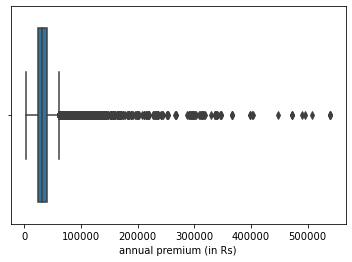

In [38]:
sns.boxplot(customerPolDetails['annual premium (in Rs)'])

In [39]:
percentile25 = customerPolDetails['annual premium (in Rs)'].quantile(0.25)
percentile75 = customerPolDetails['annual premium (in Rs)'].quantile(0.75)
iqr = np.subtract(*np.percentile(1, [75, 25]))
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
customerPolDetails[customerPolDetails['annual premium (in Rs)'] > upper_limit]
customerPolDetails[customerPolDetails['annual premium (in Rs)'] < lower_limit]

,customer_id,annual premium (in Rs),sales channel code,vintage,response
5,6.0,2630.0,160.0,176.0,0.0
6,7.0,23367.0,152.0,249.0,0.0
15,16.0,2630.0,156.0,147.0,1.0
27,28.0,19135.0,152.0,57.0,0.0
30,31.0,2630.0,160.0,136.0,0.0
...,...,...,...,...,...
381074,381075.0,21113.0,152.0,248.0,0.0
381086,381087.0,2630.0,152.0,208.0,0.0
381092,381093.0,2630.0,124.0,130.0,0.0
381094,381095.0,2630.0,26.0,84.0,0.0


In [40]:
new_df = customerPolDetails[customerPolDetails['annual premium (in Rs)'] < upper_limit]
new_df.shape

(285541, 5)

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warning

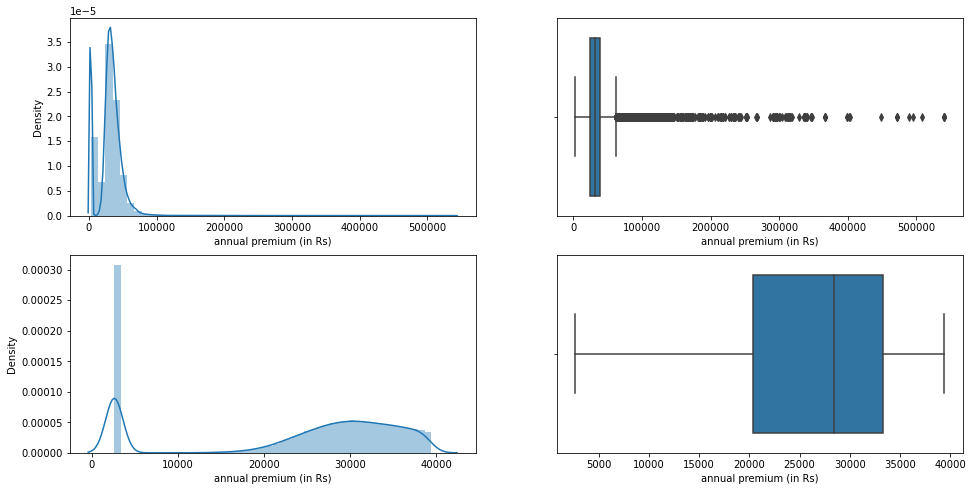

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(customerPolDetails['annual premium (in Rs)'])
plt.subplot(2,2,2)
sns.boxplot(customerPolDetails['annual premium (in Rs)'])
plt.subplot(2,2,3)
sns.distplot(new_df['annual premium (in Rs)'])
plt.subplot(2,2,4)
sns.boxplot(new_df['annual premium (in Rs)'])
plt.show()

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

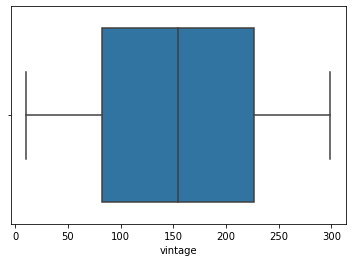

In [42]:
sns.boxplot(customerPolDetails['vintage'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales channel code'>

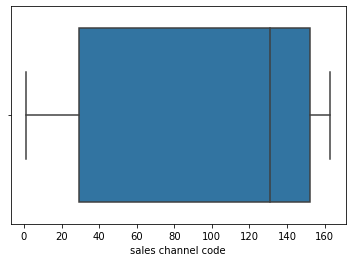

In [43]:
sns.boxplot(customerPolDetails['sales channel code'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response'>

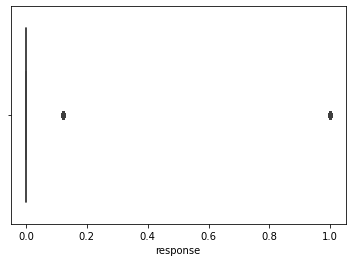

In [44]:
sns.boxplot(customerPolDetails['response'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

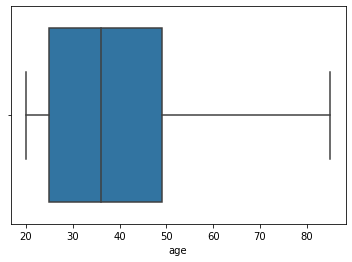

In [45]:
# Outlier CustomerDetail :
sns.boxplot(customerDetails['age'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_damage'>

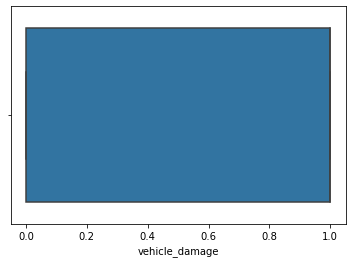

In [46]:
sns.boxplot(customerDetails['vehicle_damage'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previously_insured'>

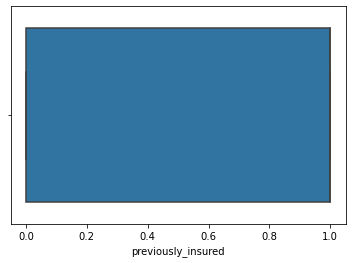

In [47]:
sns.boxplot(customerDetails['previously_insured'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region code'>

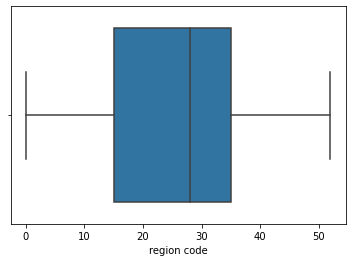

In [48]:
sns.boxplot(customerDetails['region code'])

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_age'>

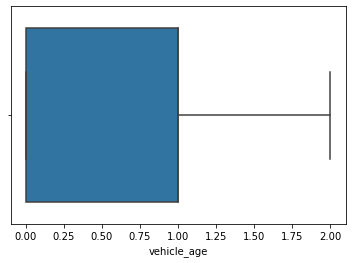

In [49]:
sns.boxplot(customerDetails['vehicle_age'])

In [51]:
# Remove white spaces
customerDetails.apply(lambda x : x.str.strip() if x.dtype == 'object' else x)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0,44.0,1,28.0,1,2,1
1,2.0,0,76.0,1,3.0,1,1,0
2,3.0,0,47.0,1,28.0,1,2,1
3,4.0,0,21.0,1,11.0,0,0,0
4,5.0,1,29.0,1,41.0,0,0,0
...,...,...,...,...,...,...,...,...
381104,381105.0,0,74.0,1,26.0,0,1,0
381105,381106.0,0,30.0,1,37.0,0,0,0
381106,381107.0,0,21.0,1,30.0,0,0,0
381107,381108.0,1,68.0,1,14.0,1,2,1


In [52]:
customerPolDetails.apply(lambda x : x.str.strip() if x.dtype == 'object' else x)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [53]:
# case correction(lower or upper, any one) 
customerDetails.apply(lambda x : x.str.upper() if x.dtype == 'object' else x)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0,44.0,1,28.0,1,2,1
1,2.0,0,76.0,1,3.0,1,1,0
2,3.0,0,47.0,1,28.0,1,2,1
3,4.0,0,21.0,1,11.0,0,0,0
4,5.0,1,29.0,1,41.0,0,0,0
...,...,...,...,...,...,...,...,...
381104,381105.0,0,74.0,1,26.0,0,1,0
381105,381106.0,0,30.0,1,37.0,0,0,0
381106,381107.0,0,21.0,1,30.0,0,0,0
381107,381108.0,1,68.0,1,14.0,1,2,1


In [61]:
#  Convert nominal data (categorical) into dummies 
# for future modeling use if required
dummy_variable = pd.get_dummies(customerDetails['vehicle_damage'])
dummy_variable.rename(columns={'No':'vehicle_damage - No','Yes':'vehicle_damage - Yes'}, inplace = True)

In [62]:
dummy_variable.head(5)

,0,1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [64]:
customerDetails = pd.concat([customerDetails, dummy_variable], axis = 1)

In [65]:
customerDetails.head(5)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,0,1
0,1.0,0,44.0,1,28.0,1,2,1,0,1
1,2.0,0,76.0,1,3.0,1,1,0,1,0
2,3.0,0,47.0,1,28.0,1,2,1,0,1
3,4.0,0,21.0,1,11.0,0,0,0,1,0
4,5.0,1,29.0,1,41.0,0,0,0,1,0


In [66]:
# Drop Duplicates (duplicated rows)
customerDetails.drop("vehicle_damage", axis = 1, inplace =True)
customerDetails.head(5)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,0,1
0,1.0,0,44.0,1,28.0,1,2,0,1
1,2.0,0,76.0,1,3.0,1,1,1,0
2,3.0,0,47.0,1,28.0,1,2,0,1
3,4.0,0,21.0,1,11.0,0,0,1,0
4,5.0,1,29.0,1,41.0,0,0,1,0


### Q3.Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

In [48]:
customerDetails

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0,44.0,1,28.0,1,2,1
1,2.0,0,76.0,1,3.0,1,1,0
2,3.0,0,47.0,1,28.0,1,2,1
3,4.0,0,21.0,1,11.0,0,0,0
4,5.0,1,29.0,1,41.0,0,0,0
...,...,...,...,...,...,...,...,...
381104,381105.0,0,74.0,1,26.0,0,1,0
381105,381106.0,0,30.0,1,37.0,0,0,0
381106,381107.0,0,21.0,1,30.0,0,0,0
381107,381108.0,1,68.0,1,14.0,1,2,1


In [49]:
customerPolDetails

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [50]:
master_table = pd.merge(customerDetails,customerPolDetails)

In [51]:
master_table

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,0,44.0,1,28.0,1,2,1,40454.0,26.0,217.0,1.0
1,2.0,0,76.0,1,3.0,1,1,0,33536.0,26.0,183.0,0.0
2,3.0,0,47.0,1,28.0,1,2,1,38294.0,26.0,27.0,1.0
3,4.0,0,21.0,1,11.0,0,0,0,28619.0,152.0,203.0,0.0
4,5.0,1,29.0,1,41.0,0,0,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
377658,381105.0,0,74.0,1,26.0,0,1,0,30170.0,26.0,88.0,0.0
377659,381106.0,0,30.0,1,37.0,0,0,0,40016.0,152.0,131.0,0.0
377660,381107.0,0,21.0,1,30.0,0,0,0,35118.0,160.0,161.0,0.0
377661,381108.0,1,68.0,1,14.0,1,2,1,44617.0,124.0,74.0,0.0


In [52]:
master_table.set_index('customer_id')

,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
customer_id,,,,,,,,,,,
1.0,0,44.0,1,28.0,1,2,1,40454.0,26.0,217.0,1.0
2.0,0,76.0,1,3.0,1,1,0,33536.0,26.0,183.0,0.0
3.0,0,47.0,1,28.0,1,2,1,38294.0,26.0,27.0,1.0
4.0,0,21.0,1,11.0,0,0,0,28619.0,152.0,203.0,0.0
5.0,1,29.0,1,41.0,0,0,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381105.0,0,74.0,1,26.0,0,1,0,30170.0,26.0,88.0,0.0
381106.0,0,30.0,1,37.0,0,0,0,40016.0,152.0,131.0,0.0
381107.0,0,21.0,1,30.0,0,0,0,35118.0,160.0,161.0,0.0


### Q4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

 #### i. Gender wise average annual premium

 #### ii. Age wise average annual premium

 #### iii. Is your data balanced between the genders?

 ####     (Hint: Data is balanced if number of counts in each group is approximately same)

 #### iv. Vehicle age wise average annual premium.

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


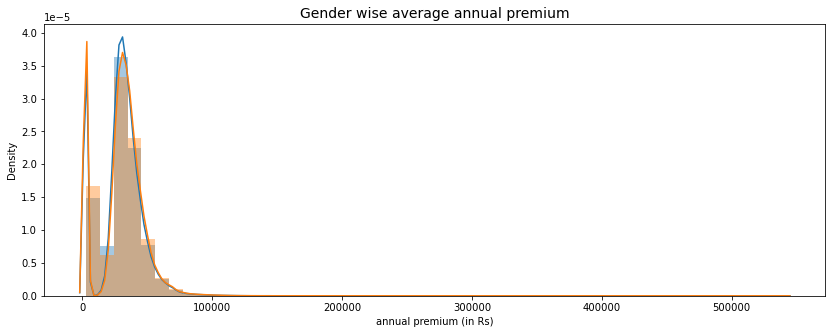

In [54]:
## i: Gender wise average annual premium
plt.figure(figsize = (14, 5))
sns.distplot(master_table.loc[(master_table['Gender'] == 1), 'annual premium (in Rs)'])
sns.distplot(master_table.loc[(master_table['Gender'] == 0), 'annual premium (in Rs)'])
plt.title('Gender wise average annual premium', fontsize = 14)
plt.show()

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


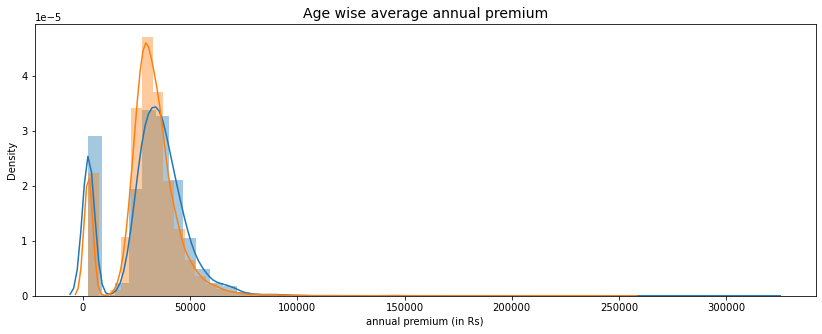

In [57]:
## i: Age wise average annual premium
plt.figure(figsize = (14, 5))
sns.distplot(master_table.loc[(master_table['age'] == 44), 'annual premium (in Rs)'])
sns.distplot(master_table.loc[(master_table['age'] == 21), 'annual premium (in Rs)'])
plt.title('Age wise average annual premium', fontsize = 14)
plt.show()

C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


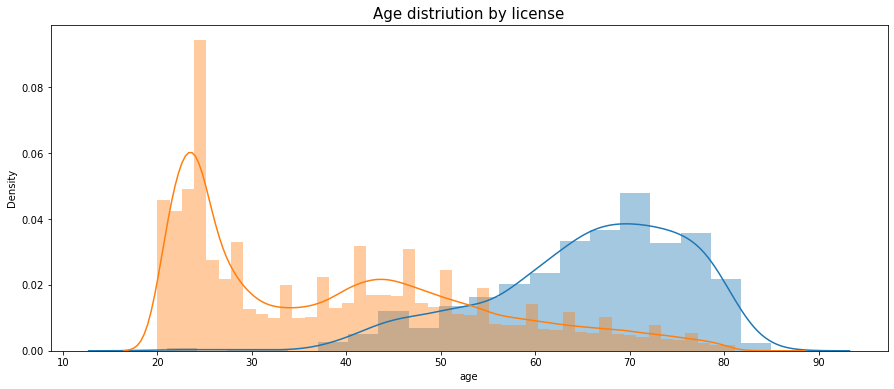

In [61]:
## i: Gender wise average annual premium
plt.figure(figsize = (15, 6))
sns.distplot(master_table.loc[(master_table['driving_licence_present'] == 0), 'age'])
sns.distplot(master_table.loc[(master_table['driving_licence_present'] == 1), 'age'])
plt.title('Age distriution by license', fontsize = 15)
plt.show()

In [62]:
master_table

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,0,44.0,1,28.0,1,2,1,40454.0,26.0,217.0,1.0
1,2.0,0,76.0,1,3.0,1,1,0,33536.0,26.0,183.0,0.0
2,3.0,0,47.0,1,28.0,1,2,1,38294.0,26.0,27.0,1.0
3,4.0,0,21.0,1,11.0,0,0,0,28619.0,152.0,203.0,0.0
4,5.0,1,29.0,1,41.0,0,0,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
377658,381105.0,0,74.0,1,26.0,0,1,0,30170.0,26.0,88.0,0.0
377659,381106.0,0,30.0,1,37.0,0,0,0,40016.0,152.0,131.0,0.0
377660,381107.0,0,21.0,1,30.0,0,0,0,35118.0,160.0,161.0,0.0
377661,381108.0,1,68.0,1,14.0,1,2,1,44617.0,124.0,74.0,0.0


In [63]:
master_table.groupby('Gender',0).sum()

,customer_id,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,
0,3.894127e+10,8350412.0,203595,5390462.0,118309,141574,111715,6.253067e+09,2.174650e+07,3.147938e+07,28239.750193
1,3.302819e+10,6310754.0,173264,4577222.0,86307,88638,78969,5.289245e+09,2.056554e+07,2.681989e+07,18022.114010


C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


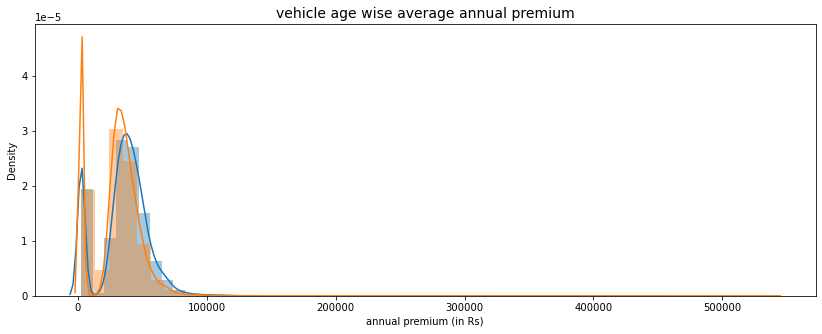

In [64]:
## iv: Vehicle age wise average annual premium.
plt.figure(figsize = (14, 5))
sns.distplot(master_table.loc[(master_table['vehicle_age'] == 2), 'annual premium (in Rs)'])
sns.distplot(master_table.loc[(master_table['vehicle_age'] == 1), 'annual premium (in Rs)'])
plt.title('vehicle age wise average annual premium', fontsize = 14)
plt.show()

### 5. Is there any relation between Person Age and annual premium?

#### Hint: use correlation function (Correlation describes the relationship between two variables). 

#### Correlation coefficient < -0.5           - Strong negative relationship

#### Correlation coefficient > 0.5            -  Strong positive relationship

#### 0.5 < Correlation coefficient < 0.5   - There is no relationship. 

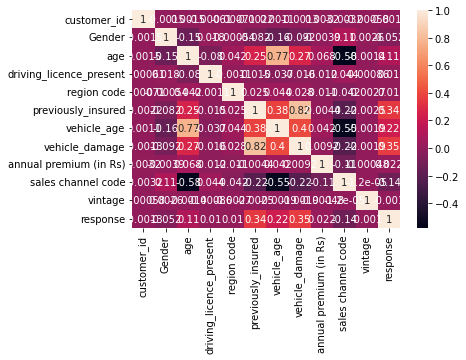

In [65]:
corrMatrix = master_table.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()